In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [72]:
df=pd.read_csv('CMU Data.csv')
#transform the datetime
df['Timestamp']=pd.to_datetime(df['Timestamp'])#,format='%Y-%m-%d')
print(df.shape)
df.head(10)

(2269, 10)


,Timestamp,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal
0,2020-09-10,0.243,0.94165,0.84195,3405.97,28.45,0.055,NaN,NaN,NaN
1,2020-09-09,0.243,0.94175,0.84725,3398.96,28.81,0.055,NaN,NaN,NaN
2,2020-09-08,0.240,0.94310,0.84915,3331.84,31.46,0.050,NaN,NaN,NaN
3,2020-09-07,0.237,0.94105,0.84615,NaN,NaN,NaN,NaN,NaN,5.291036e+08
4,2020-09-04,0.240,0.94125,0.84465,3426.96,30.75,0.052,NaN,NaN,1.030498e+09
5,2020-09-03,0.235,0.94170,0.84385,3455.06,33.60,0.046,NaN,NaN,-5.218812e+08
6,2020-09-02,0.239,0.94175,0.84355,3580.84,26.57,0.050,NaN,NaN,-8.181777e+08
7,2020-09-01,0.238,0.94375,0.83945,3526.65,26.12,0.050,137263.0,-60477.0,7.502295e+09
8,2020-08-31,0.232,0.94425,0.83775,3500.31,26.41,0.047,NaN,NaN,1.194068e+08
9,2020-08-28,0.237,0.94915,0.83995,3508.01,22.96,0.050,NaN,NaN,1.173889e+08


**Missing Values**

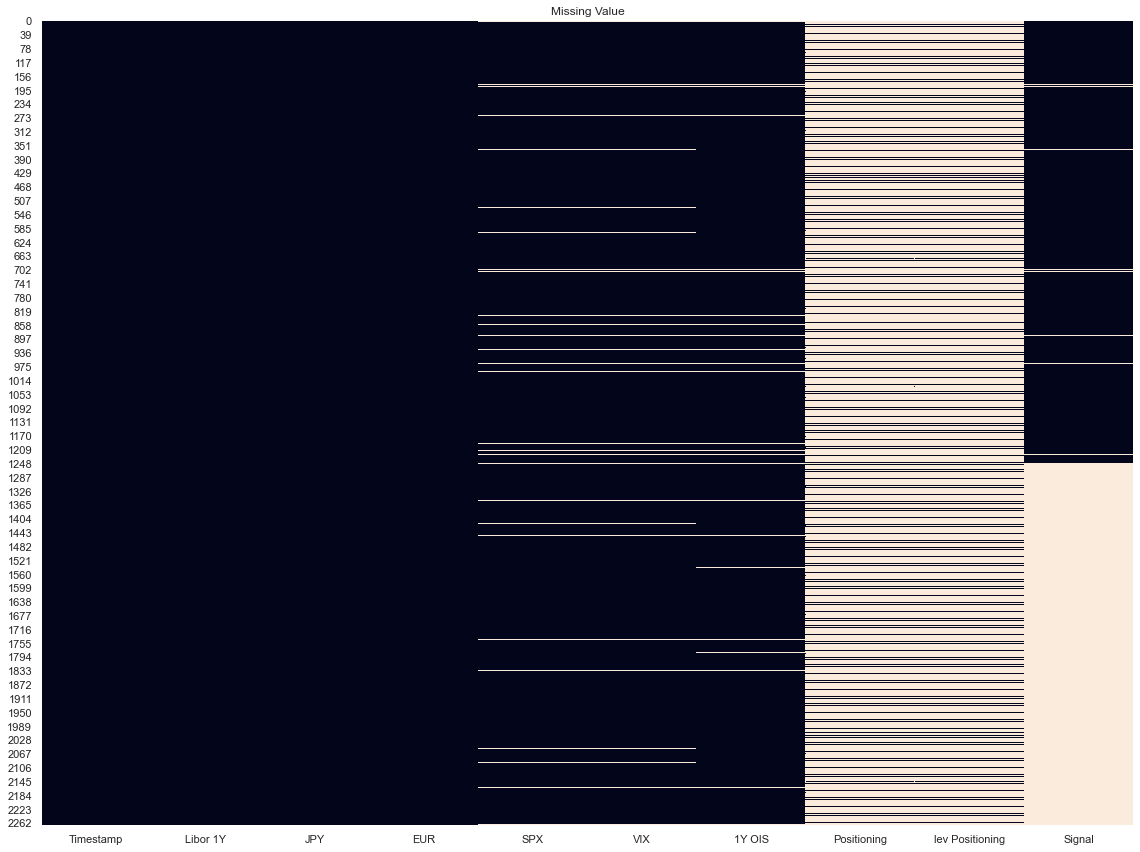

In [73]:
#Missing value plot
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(),cbar=False)
#sns.heatmap(df.iloc[np.unique(np.where(df.isnull())[0]),:].isnull(),cbar=False)
plt.title('Missing Value')
plt.tight_layout()
plt.savefig('Missing Value',dpi=300)
plt.show()

In [74]:
nanloc=np.where(pd.isnull(df.iloc[:,:-3]))
#nanloc=np.where(pd.isnull(df.iloc[:,:]))

print('Number of missing rows is {}. Number of complete rows is {}.'.format(
    len(np.unique(nanloc[0])),len(df)-len(np.unique(nanloc[0]))))
print('Number of missing columns is {}'.format(len(np.unique(nanloc[1]))))
print('Columns with missing values are {}'.format(df.columns[np.unique(nanloc[1])].values))

Number of missing rows is 86. Number of complete rows is 2183.
Number of missing columns is 3
Columns with missing values are ['SPX' 'VIX' '1Y OIS']


Observation:
1. The last aviailable signal was on 12/1/15 (row 1249).
2. Missing values are distributed among 6 columns: ['SPX' 'VIX' '1Y OIS' 'Positioning' 'lev Positioning' 'Signal'].
3. Out of 2269 total sample, there are only 249 labelled data with all columns filled. If we don't consider the column Signal, there are 451 rows labelled data, which means there are 202 more labelled data before the last entry of Signal 12/1/15.
4. Among columns ['SPX' 'VIX' '1Y OIS'], there are 86 rows with missing values. We impute those missing values by KNN.

**Impute missing values**

In [75]:
#Impute missing values for 'SPX' 'VIX' '1Y OIS'
from sklearn.impute import KNNImputer
nn=5
imputer = KNNImputer(n_neighbors=nn)

data=df.copy()
data[['SPX','VIX','1Y OIS']] = imputer.fit_transform(df[['SPX','VIX','1Y OIS']])
data.to_csv('Imputed with KNN={}.csv'.format(nn))
data.head(10)
data.tail(10)

,Timestamp,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal
2259,2012-01-13,0.546,1.30000,0.788799,1289.090000,20.910000,0.092500,NaN,NaN,NaN
2260,2012-01-12,0.546,1.30295,0.779697,1295.500000,20.470000,0.094000,NaN,NaN,NaN
2261,2012-01-11,0.577,1.30055,0.787123,1292.480000,21.050000,0.097000,NaN,NaN,NaN
2262,2012-01-10,0.606,1.30150,0.782932,1292.080000,20.690000,0.092500,147039.0,-56227.0,NaN
2263,2012-01-09,0.612,1.30140,0.783239,1280.700000,21.070000,0.100000,NaN,NaN,NaN
2264,2012-01-06,0.639,1.29885,0.786133,1277.810000,20.630000,0.107000,NaN,NaN,NaN
2265,2012-01-05,0.675,1.29500,0.782442,1281.060000,21.480000,0.106000,NaN,NaN,NaN
2266,2012-01-04,0.684,1.30380,0.772708,1277.300000,22.220000,0.112000,NaN,NaN,NaN
2267,2012-01-03,0.693,1.30395,0.766254,1277.060000,22.970000,0.115000,144716.0,-43317.0,NaN
2268,2012-01-02,0.681,1.30055,0.773455,2227.383832,16.470937,0.807793,NaN,NaN,NaN


**Exploratory data analysis (EDA)**

In [76]:
#All labeled data
labeled=data.dropna()
print(labeled.shape)
labeled.head(10)

(249, 10)


,Timestamp,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal
7,2020-09-01,0.238,0.94375,0.83945,3526.65,26.12,0.050,137263.0,-60477.0,7.502295e+09
12,2020-08-25,0.238,0.93990,0.84500,3443.62,22.03,0.056,142723.0,-66074.0,-1.438299e+08
17,2020-08-18,0.233,0.94870,0.83815,3389.78,21.51,0.053,135808.0,-62915.0,6.075233e+08
22,2020-08-11,0.248,0.93905,0.85180,3333.69,24.03,0.050,134130.0,-66880.0,-3.222569e+09
27,2020-08-04,0.216,0.94590,0.84725,3306.51,23.76,0.035,122424.0,-67099.0,2.379682e+09
32,2020-07-28,0.247,0.95155,0.85355,3218.44,25.44,0.034,108987.0,-49178.0,-3.077999e+09
37,2020-07-21,0.242,0.93630,0.86755,3257.30,24.84,0.031,100094.0,-62415.0,2.032255e+08
42,2020-07-14,0.259,0.93245,0.87735,3197.52,29.52,0.034,98056.0,-63373.0,1.210212e+09
47,2020-07-07,0.251,0.93005,0.88715,3145.32,29.43,0.033,87117.0,-58405.0,-2.820594e+09
52,2020-06-30,0.262,0.92650,0.89025,3100.29,30.43,0.028,79163.0,-57173.0,-6.194336e+07


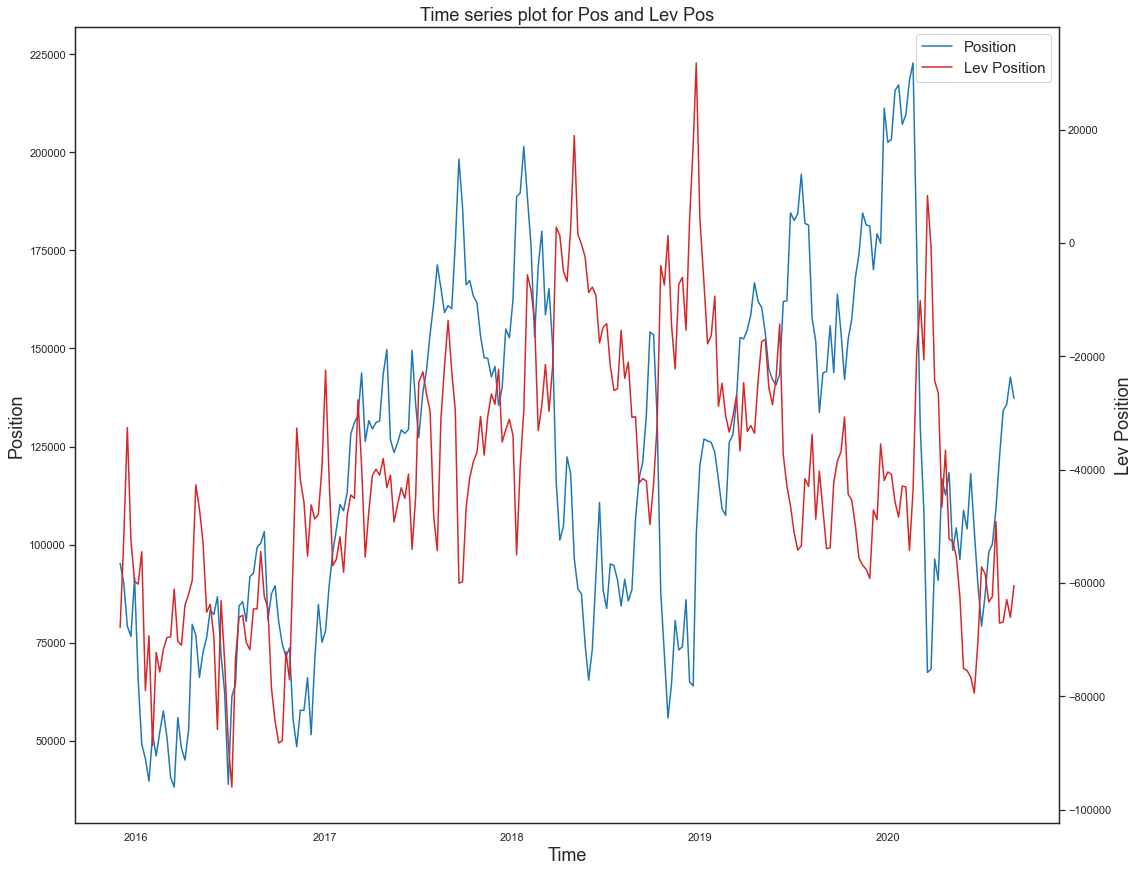

In [77]:
#Time series for Pos and Lev Pos
fig, ax = plt.subplots(figsize=(16,12))
s=18 #fontsize
color = 'tab:blue'
lns1=ax.plot(labeled['Timestamp'],labeled['Positioning'],label='Position',color=color)
ax.set_xlabel('Time',size=s)
ax.set_ylabel('Position',size=s)

ax2=ax.twinx()
color = 'tab:red'
# make a plot with different y-axis using second axis object
lns2=ax2.plot(labeled['Timestamp'],labeled['lev Positioning'],label='Lev Position', color=color)
ax2.set_ylabel('Lev Position',size=s)  # we already handled the x-label with ax1

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0,fontsize=s-3)

fig.tight_layout()

plt.title('Time series plot for Pos and Lev Pos',size=s)
plt.savefig('TS Pos and Lev Pos',dpi=300)
plt.show()

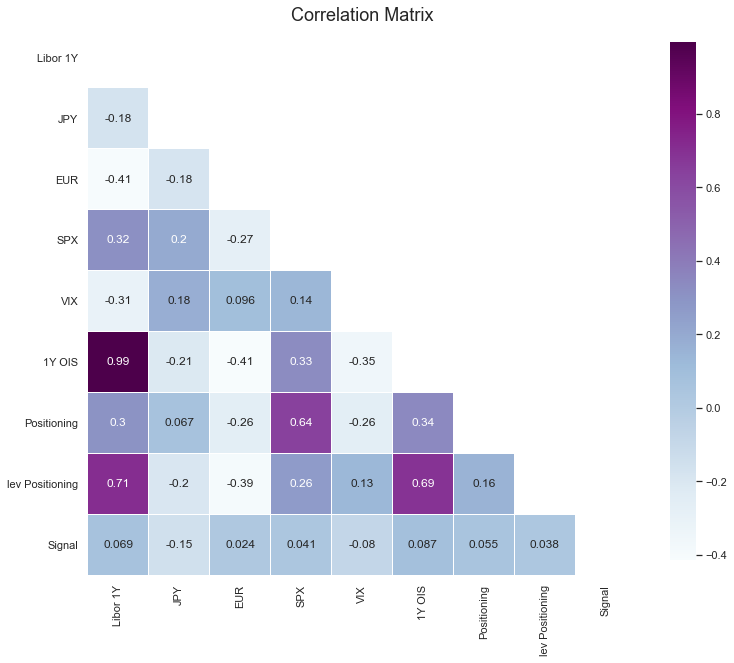

In [78]:
#Correlation
# Compute the correlation matrix
corr = labeled.iloc[:,1:].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 11))
ax = sns.heatmap(corr, square=True,linewidths=.3,annot=True,cbar_kws={"shrink": .7}, mask=mask, cmap="BuPu")
# Draw the heatmap with the mask and correct aspect ratio
plt.tight_layout()
plt.title('Correlation Matrix',size=s)
plt.savefig('Correlation Matrix',dpi=300)
plt.show()

Observations:

1. Overall the pos and lev pos has 0.16 positve correlation. But if we look at the plot, there're some period in which they diviged and exhibit local negative correlation. One idea is to identify the signals for those periods.

2. Next up I continued to explore local and rolling correlations.

In [79]:
#Rolling correlation

n=8 #8 data points represents 2-month data
l=[] #list of correlation
for i in range(len(labeled)-n):
    #every row of l is the correlation between Position and other variables
    l.append(np.corrcoef(labeled.iloc[i:i+n,1:],rowvar=False)[6,:])
    
l=np.array(l)

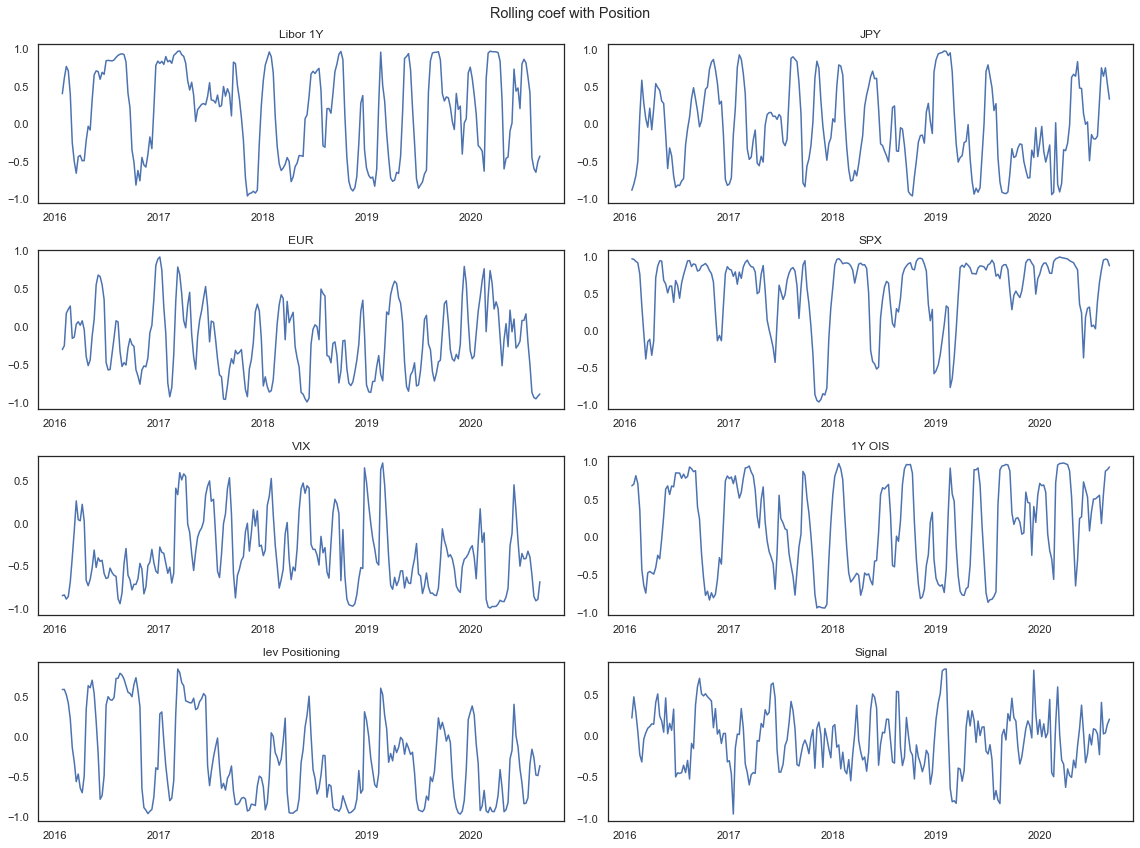

In [80]:
#Rolling correlation plot
labels=labeled.columns[1:]
ind=[0,1,2,3,4,5,7,8]
fig,ax=plt.subplots(4,2,figsize=(16,12))
for i in range(len(ind)):
    ax[i//2][i%2].plot(labeled['Timestamp'][:-n],l[:,ind[i]])
    ax[i//2][i%2].set_title(labels[ind[i]])


fig.suptitle('Rolling coef with Position')
plt.tight_layout()

plt.savefig('Rolling correlation',dpi=300)
plt.show()

In [89]:
from scipy.stats import ttest_1samp
stat, p = ttest_1samp(l, popmean=0, axis=0)
print('Significant Correlation Variables are:',labels[p<0.05].values)
# JPY and Signal are not significant correlated to Position

Significant Correlation Variables are: ['Libor 1Y' 'EUR' 'SPX' 'VIX' '1Y OIS' 'Positioning' 'lev Positioning']


**Simple Models**

In [92]:
#Benchmark: OLS
#Since the dataset is already small, train&test set are not splitted yet
X=labeled.drop(columns = ['Timestamp','Positioning'])
y=labeled['Positioning']

In [115]:
import statsmodels.api as sm
cX=X.copy()
cX['constant']=1
model_OLS = sm.OLS(y, cX).fit()
print(model_OLS.summary())
mse=np.mean((y-model_OLS.predict(cX))**2)
ape=np.mean(np.abs((y-model_OLS.predict(cX))/y))
print('\nOLS:')
print('MSE is {}'.format(mse))
print('Average Percentage Error is {}'.format(ape))

                            OLS Regression Results                            
Dep. Variable:            Positioning   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     39.37
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.16e-39
Time:                        18:13:23   Log-Likelihood:                -2909.2
No. Observations:                 249   AIC:                             5836.
Df Residuals:                     240   BIC:                             5868.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Libor 1Y        -1.304e+05   3.02e+04     

In [118]:
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor(n_estimators=20,random_state=0,criterion='mae',
                               min_samples_leaf = 2).fit(X,y)


mse=np.mean((y-model_RF.predict(X))**2)
ape=np.mean(np.abs((y-model_RF.predict(X))/y))
print('RF:')
print('MSE is {}'.format(mse))
print('Average Percentage Error is {}'.format(ape))

RF:
MSE is 73028081.99517816
Average Percentage Error is 0.06595696038694605


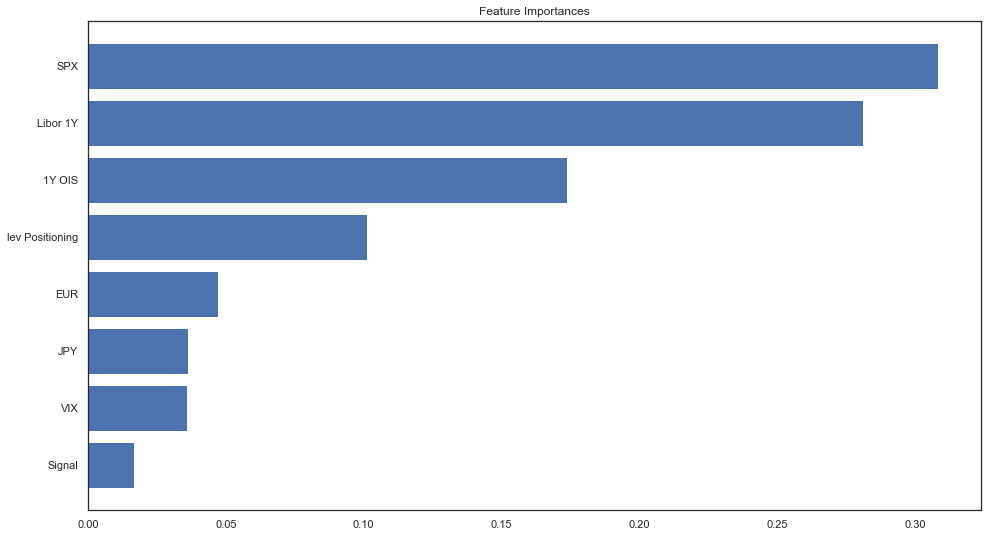

In [121]:
X_features = list(X.columns)
rf_importances = model_RF.feature_importances_
ind = np.argsort(rf_importances)

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(range(len(ind)), rf_importances[ind], color='b', align='center')
ax.set(title = 'Feature Importances')
plt.yticks(range(len(ind)), [X_features[i] for i in ind])
plt.savefig('Feature Importances by RF',dpi=300)
plt.show()